# Old town code

## Import

In [35]:
import pandas
import sklearn
from sklearn import model_selection
from sklearn import linear_model

## Load data

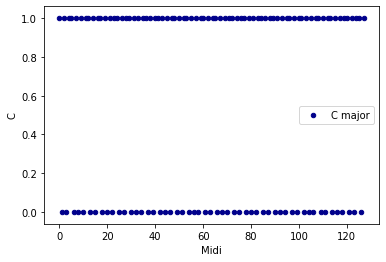

In [36]:
df = pandas.read_csv("notes.csv")
df.plot.scatter(x="Midi", y="C", label="C major", color="DarkBlue")

## Split into training and test sets

Training set size: 102
Test set size: 26


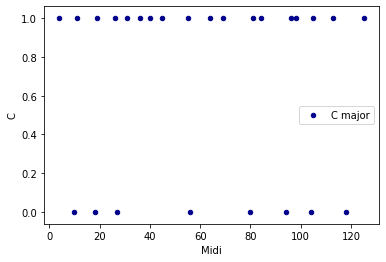

In [37]:
train, test = sklearn.model_selection.train_test_split(df, test_size=0.20, random_state=42)

print("Training set size: %i" % len(train))
print("Test set size: %i" % len(test))

test.plot.scatter(x="Midi", y="C", label="C major", color="DarkBlue")

## Linear Regression

In [38]:
x_train = train.filter(items=["Midi"])
y_train = train.filter(items=["A"])

linear = sklearn.linear_model.LinearRegression()
linear.fit(x_train, y_train)

x_test = test.filter(items=["Midi"])
y_test = test.filter(items=["A"])

print("Training score (bigger is worse): %f" % linear.score(x_train, y_train))
print("Testing score (bigger is worse): %f" % linear.score(x_test, y_test))

output = test.copy()
output["Linear Prediction (A major)"] = linear.predict(x_test)
output.sample(n=5)

Training score (bigger is worse): 0.000650
Testing score (bigger is worse): -0.017206


,Midi,A,B,C,D,Linear Prediction (A major)
84,84,0,0,1,0,0.595061
19,19,0,0,1,1,0.572974
80,80,1,1,0,0,0.593702
56,56,1,1,0,0,0.585547
105,105,1,0,1,1,0.602197


## Logistic Regression

In [39]:
logistic = sklearn.linear_model.LogisticRegression(solver = 'lbfgs', multi_class = 'ovr')
logistic.fit(x_train, y_train.values.ravel())

y_train_predicted = logistic.predict(x_train)
print("Training accuracy: %i%%" % (100 * logistic.score(x_train, y_train)))

y_test_predicted = logistic.predict(x_test)
print("Testing accuracy: %i%%" % (100 * logistic.score(x_test, y_test)))

output = test.copy()
output["Linear Prediction (A major)"] = logistic.predict(x_test)
output.sample(n=5)



Training accuracy: 58%
Testing accuracy: 53%


,Midi,A,B,C,D,Linear Prediction (A major)
36,36,0,0,1,0,1
81,81,1,0,1,1,1
64,64,1,1,1,1,1
19,19,0,0,1,1,1
98,98,1,0,1,1,1
